# Assignment 1 - Axelrods tournament

#### When you have finished <font color="red">download this page as an IP Notebook file</font> (File -> Download as -> IPython Notebook (.ipynb) ) and then upload to WOLF by midnight on Friday 17/11/2017

#### <font color="purple">Please enter your Student Number in the space provided below</font>

1828478

Implement a series of player/agents to play the prisoners dilemma against each other for Axelrod’s tournament and see which strategy performs the best overall.  This assignment is worth <b>40%</b> of the module.<br>Below is the code for a very simple player use this as a template for the design of your other players.  

<font color="red"><b>Q-1:</b></font><font color="purple">You will devise and add your tournament players in the space below.  You should produce a minimum of 6 different strategies, comment your code to indicate the name or nature of the strategy.</font> <b> (4 marks each)</b><br><br>Each player should be in a class name prefixed with the name Player, so if your player is to be called <b><font color="purple">Bond</font></b> your class name should be Player<b><font color="purple">Bond</font></b>.  Each player class should contain one method with the prototype<br> 
&emsp;&emsp;&emsp;&emsp;<b><font color="blue">move</font>(<font color="red">self, history</font>)</b><br>The history parameter gives two lists the history of player's moves against the current opponent and the history of the opponent's aginst the player. The method should also <b><font color="blue">return</font></b> either a <b><font color="green">'C'</font></b> or a <b><font color="green">'D'</font></b> for cooperate or defect respectively. <i>Note: You can place multiple Player classes in the space provided below.</i> 

In [1]:
#Defect strategy
#This player defects on every rounds

class PlayerDefect:
    def move(self, history):
        return 'D'

In [2]:
#Cooperate strategy 
#This player cooperates on every rounds

class PlayerCooperate:
    def move(self, history):
        return 'C'

In [3]:
#Slow Tit for Two Tats Strategy
#This player starts by cooperating twice, then if the opponent plays the same move twice, plays that move, otherwise plays previous move

class PlayerSlowTitForTwoTats:
    def move(self, history):
        mine, theirs = history
        
        if len(mine) < 2:
            return 'C'

        if theirs[-2] == theirs[-1]:
            return theirs[-1]
        
        return mine[-1]

In [4]:
#Aggravate Strategy
#This player defects on the first three rounds and then starts cooperating until opponent defects. After that, it defects all the time

class PlayerAggravater:
    def move(self, history):
        mine, theirs = history
        if len(mine) < 3:
            return 'D'
        elif theirs[-1] == 'D':
            return 'D'
        return 'C'

In [5]:
#Pavlov Strategy
# This player cooperates on the first round and defects only if both the players did not agree on the previous round

class PlayerPavlov:
     def move(self, history):
        mine, theirs = history
        
        try:
            if mine[-1] != theirs[-1]:
                return 'D'
            else:
                return 'C'
        except IndexError:
            return 'C'


In [6]:
#Mutual Player
#This player defects on the first round and only cooperates if both the play the same move

class PlayerMutual:
    def move(self, history):
        mine, theirs = history
     
        try:
            if (mine[-1] == 'D' and theirs[-1] == 'D') or (mine[-1] == 'C' and theirs[-1] == 'C') :
                return 'C'
            else:
                return 'D'
        except IndexError:
            return 'D'

The code below is a modified version of Allen B. Downey's program to play Axelrods tournament in IPython notepad.  The player code is now read from classes in memory rather than local files and a score for each agent as follows:<br> - 3 if they both cooperate<br> - 1 if they both defect<br> - 5 if a player defects against a cooperating player and<br> - 0 if a player cooperates against a defecting player.

In [7]:
""" 
Code example by Allen B. Downey 
from Complexity and Computation (2011).  
Modified by D. Case to work in IPython notebook.
"""
## The following are methods/functions/operators that 
## it is safe to use, if required, in your agent  
safe_builtins = """
abs divmod staticmethod
all enumerate int ord str
any isinstance pow sum
basestring issubclass print super
bin iter property tuple
bool filter len range type
bytearray float list unichr
callable format reduce unicode
chr frozenset long vars
classmethod getattr map repr xrange
cmp max reversed zip
compile hasattr round
complex hash min set apply
delattr help next setattr buffer
dict hex object slice coerce
id oct sorted intern
"""
class Player(object):
    """Represents a player.

    Attributes:
      filename: file the code was read from
      globs: global environment used to execute code
      locs: local environment used to execute code
    """
    def __init__(self, filename):
        self.filename = filename
        self.globs = self.make_globals()
        self.locs = self.make_locals()
        self.move = filename.move
        self.total = 0

    def add(self, inc):
        self.total += inc

    def make_globals(self):
        """Make the global environment."""
        try:
            t = [(k, __builtins__[k]) for k in safe_builtins.split()]
        except TypeError:
            t = [(k, getattr(__builtins__, k)) for k in safe_builtins.split()]
        safe_dict = dict(__builtins__=dict(t))

        safe_list = ['math', 'random']
        t = [(k, globals().get(k)) for k in safe_list]
        safe_dict.update(t)

        return safe_dict

    def make_locals(self):
        """Make the local environment."""
        return dict()

class Referee(object):
    def __init__(self, player_dir='.'):
        self.player_dir = player_dir

    def find_players(self, pattern='Player*.py'):
        """Find files that match pattern and read players.

        Returns a list of Player objects.
        """
        filenames = [val for nm, val in globals().iteritems() if len(nm) > 6 and nm[:6] == 'Player']
        filenames.sort()

        players = []
        for className in filenames:
            player = Player(className())
            players.append(player)

            move = getattr(player, 'move', None)
            if not move:
                print '%s has no move method.' % className

        return players

    def run_tournament(self, players, n=50):
        """Run a tournament that runs each player against the others.

        Returns an array of scores.
        """
        results = {}
        if len(players) == 1:
            self.run_head_to_head(players[0], players[0], n*2)
            return
        for player1 in players:
            for player2 in players:
                if player1 == player2:
                    continue
                self.run_head_to_head(player1, player2, n)
        for player1 in players:
            results[player1.filename.__class__.__name__] = player1.total
        return results

    def run_head_to_head(self, player1, player2, n=50):
        """Run players against each other n times.

        Returns a pair of scores.
        """
        moves1 = []
        moves2 = []
        for i in xrange(n):
            move1, move2 = self.one_round(player1, player2, moves1, moves2)
            moves1.append(move1)
            moves2.append(move2)

    def one_round(self, player1, player2, moves1, moves2):
        """Plays one round and updates the scores.

        Returns the players' moves.
        """
        move1 = self.call(player1, (moves1, moves2))
        move2 = self.call(player2, (moves2, moves1))
        if move1 == move2:
            if move1 == 'C':
                score = 3
            else:
                score = 1
            player1.add(score)
            player2.add(score)
        elif move1 == 'C' and move2 == 'D':
            player2.add(5)
        elif move1 == 'D' and move2 == 'C':
            player1.add(5)
        return move1, move2

    def call(self, player, history):
        """Calls the player's move function and returns the result."""
        player.locs['history'] = history
        decision = player.move(history)
        return decision

## Note: the main routine returns a dictionary 
## of results once the simulation has completed
def main(n=100):
    ref = Referee()
    players = ref.find_players()
    return ref.run_tournament(players, n)

Calling main routine runs the tournament, the optional parameter specifies the number of rounds played between each pair of players, the default is 100.  The main routine returns a dictionary of results with the performance score for each player agent. For example:<br>&emsp;&emsp;<b><font color="green">{'PlayerGrouch': 404, 'PlayerFlipper': 222, 'PlayerPollyanna': 78}</font></b><br>You <font color="red">should also experiment with different numbers of rounds</font> to observe if the relative performance of the players changes. 

In [8]:
## call main to run the tournament
#result in round 2
result = main(2)
print result

#result in round 4
result1 = main(4)
print result1

#result in round 10
result2 = main(10)
print result2

#result in round 15
result3 = main(15)
print result3

#result in round 20
result4 = main(20)
print result4

#result in round 25
result5 = main(25)
print result5

{'PlayerCooperate': 24, 'PlayerDefect': 68, 'PlayerAggravater': 68, 'PlayerSlowTitForTwoTats': 24, 'PlayerMutual': 56, 'PlayerPavlov': 30}
{'PlayerCooperate': 54, 'PlayerDefect': 120, 'PlayerAggravater': 114, 'PlayerSlowTitForTwoTats': 68, 'PlayerMutual': 94, 'PlayerPavlov': 78}
{'PlayerCooperate': 162, 'PlayerDefect': 276, 'PlayerAggravater': 222, 'PlayerSlowTitForTwoTats': 200, 'PlayerMutual': 226, 'PlayerPavlov': 216}
{'PlayerCooperate': 252, 'PlayerDefect': 406, 'PlayerAggravater': 310, 'PlayerSlowTitForTwoTats': 306, 'PlayerMutual': 342, 'PlayerPavlov': 324}
{'PlayerCooperate': 342, 'PlayerDefect': 536, 'PlayerAggravater': 396, 'PlayerSlowTitForTwoTats': 420, 'PlayerMutual': 452, 'PlayerPavlov': 444}
{'PlayerCooperate': 432, 'PlayerDefect': 666, 'PlayerAggravater': 492, 'PlayerSlowTitForTwoTats': 526, 'PlayerMutual': 558, 'PlayerPavlov': 560}


<font color="red"><b>Q-2:</b></font><font color="purple">The results would be better presented in a bar chart.  Is it possible to produce a bar chart in matplotlib?  <i><b>(Hint: Yes it is)</b></i>.  Research (prio ) how to produce a bar chart in matplotlib and in the space below take the output from running main to produce the plot.</font> <b> (6 marks)</b>

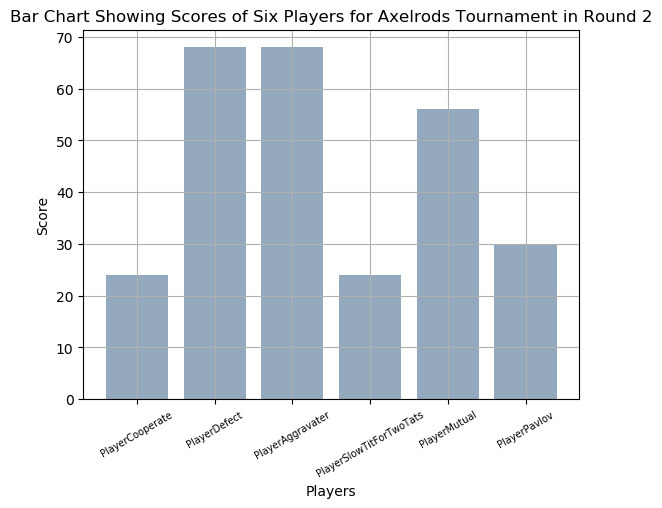

In [15]:
import matplotlib.pyplot as plt

plt.rcdefaults()

plt.bar(range(len(result)), list(result.values()), align = 'center', alpha = 0.5, color = '#2B547E')
plt.xlabel('Players')
plt.ylabel('Score')
plt.title('Bar Chart Showing Scores of Six Players for Axelrods Tournament in Round 2')
plt.xticks(range(len(result)), list(result.keys()), fontsize = 7, rotation = 30) 
plt.grid(True)
plt.show()

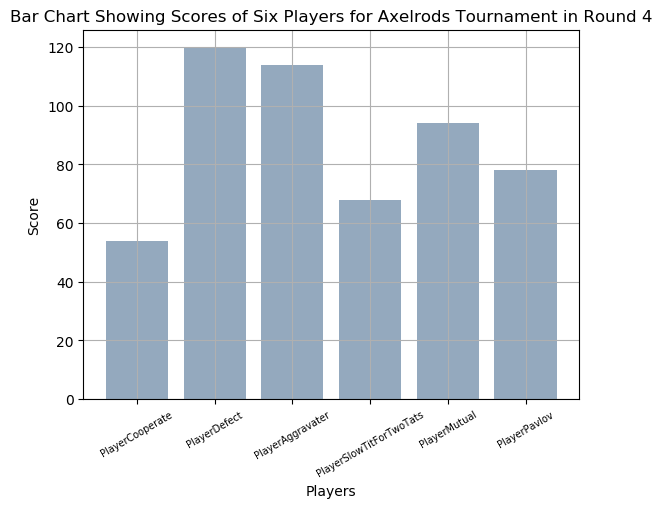

In [10]:
import matplotlib.pyplot as plt

plt.rcdefaults()

plt.bar(range(len(result1)), list(result1.values()), align = 'center', alpha = 0.5, color = '#2B547E')
plt.xlabel('Players')
plt.ylabel('Score')
plt.title('Bar Chart Showing Scores of Six Players for Axelrods Tournament in Round 4')
plt.xticks(range(len(result1)), list(result1.keys()), fontsize = 7, rotation = 30) 
plt.grid(True)
plt.show()

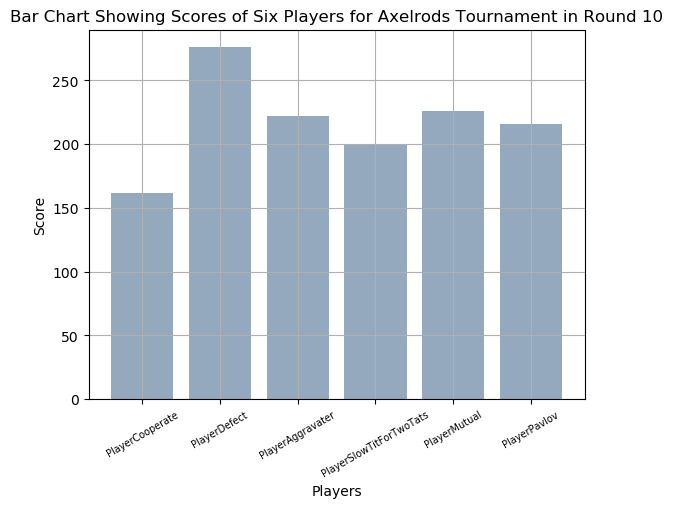

In [11]:
import matplotlib.pyplot as plt

plt.rcdefaults()

plt.bar(range(len(result2)), list(result2.values()), align = 'center', alpha = 0.5, color = '#2B547E')
plt.xlabel('Players')
plt.ylabel('Score')
plt.title('Bar Chart Showing Scores of Six Players for Axelrods Tournament in Round 10')
plt.xticks(range(len(result2)), list(result2.keys()), fontsize = 7, rotation = 30) 
plt.grid(True)
plt.show()

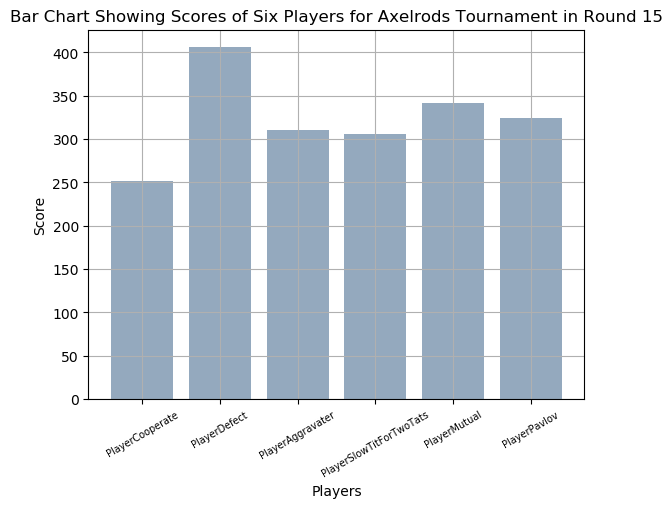

In [12]:
import matplotlib.pyplot as plt

plt.rcdefaults()

plt.bar(range(len(result3)), list(result3.values()), align = 'center', alpha = 0.5, color = '#2B547E')
plt.xlabel('Players')
plt.ylabel('Score')
plt.title('Bar Chart Showing Scores of Six Players for Axelrods Tournament in Round 15')
plt.xticks(range(len(result3)), list(result3.keys()), fontsize = 7, rotation = 30) 
plt.grid(True)
plt.show()

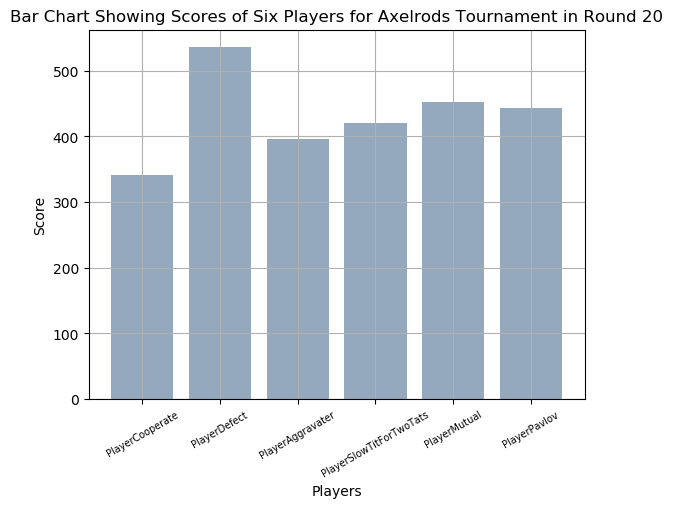

In [13]:
import matplotlib.pyplot as plt

plt.rcdefaults()

plt.bar(range(len(result4)), list(result4.values()), align = 'center', alpha = 0.5, color = '#2B547E')
plt.xlabel('Players')
plt.ylabel('Score')
plt.title('Bar Chart Showing Scores of Six Players for Axelrods Tournament in Round 20')
plt.xticks(range(len(result4)), list(result4.keys()), fontsize = 7, rotation = 30) 
plt.grid(True)
plt.show()

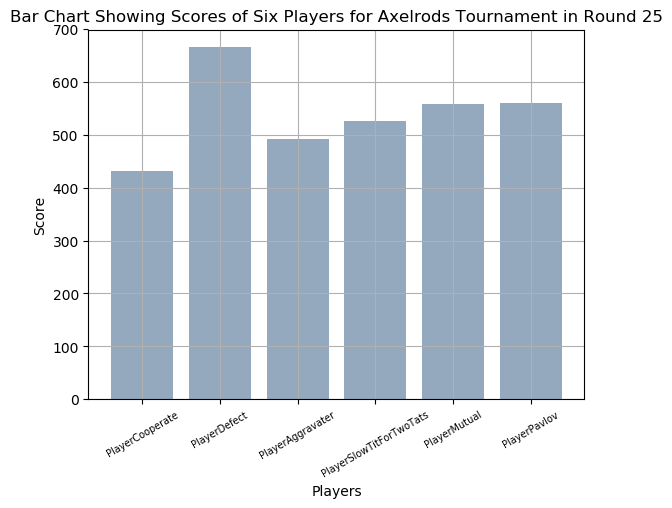

In [14]:
import matplotlib.pyplot as plt

plt.rcdefaults()

plt.bar(range(len(result5)), list(result5.values()), align = 'center', alpha = 0.5, color = '#2B547E')
plt.xlabel('Players')
plt.ylabel('Score')
plt.title('Bar Chart Showing Scores of Six Players for Axelrods Tournament in Round 25')
plt.xticks(range(len(result5)), list(result5.keys()), fontsize = 7, rotation = 30) 
plt.grid(True)
plt.show()

<font color="red"><b>Q-3:</b></font><font color="purple">Comment on the the most successful strategy found. Include a brief explanation of why this strategy has been successful and the number of rounds to achieve this performance.</font>  <b> (6 marks)</b>

Ans: Among all the strategies mentioned above, PlayerDefect proved to be the most successful strategy. It only took four rounds for this player to achieve the highest score and even after 25 rounds PlayerDefect still had the highest score.  

This player deflects in all rounds and the opponent has the option to either deflect or cooperate. So when an opponent cooperates, he/she ends up losing five points to this player. Not only that, even if the opponent deflects, this player still shares one-one point with the opponent. Because of this, PlayerDefect never loses any round by giving up five points. Hence, PlayerDefect ultimately wins by earning more points. 

<font color="red"><b>Q-4:</b></font><font color="purple">Including a brief explanation, give the asymptotic (big-O) times for the run_tournament (a) and run_head_to_head methods (b) in the Referee class?</font>  <b> (2 marks each)</b>

a)Ans:
In run_tournament, for loop depends upon the input size(n). Since nested for loop is present, the running time becomes square of the input size n i.e. O(n^2). But as this function also calls run_head_to_head method whose run time is O(n), the asymptotic (big-O) times of run_tournament becomes O(n^2)*O(n) = O(n^3).

b)Ans:
As for loop present in run_head_to_head method directly depends upon the input size, it is a linear function. Hence, asymptotic(big-O) times for this method is O(n). 

Note: This is an <b>individual assignment</b>; sharing your work with colleagues or passing off the work of others as your own is plagiarism and will harm your chance to successfully complete this module. 